## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [6]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [21]:
results = {}
for bachSize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bachSize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(bachSize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2)                 6146      
_________________________________________________________________
batch_normalization_21 (Batc (None, 2)                 8         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                48        
_________________________________________________________________
batch_normalization_22 (Batc (None, 16)                64        
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                544       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)                128       
__________

50000/50000 [==============================] - 74s 1ms/step - loss: 2.3050 - acc: 0.0999 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 72s 1ms/step - loss: 2.3048 - acc: 0.0993 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 74s 1ms/step - loss: 2.3049 - acc: 0.0974 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 74s 1ms/step - loss: 2.3048 - acc: 0.1005 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 80s 2ms/step - loss: 2.3050 - acc: 0.1000 - val_loss: 2.3049 - val_acc: 0.1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2)                 614

50000/50000 [==============================] - 12s 234us/step - loss: 1.9138 - acc: 0.2817 - val_loss: 1.9122 - val_acc: 0.2816
Epoch 41/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.9137 - acc: 0.2803 - val_loss: 1.9112 - val_acc: 0.2787
Epoch 42/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.9153 - acc: 0.2788 - val_loss: 1.8965 - val_acc: 0.2826
Epoch 43/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9117 - acc: 0.2817 - val_loss: 1.9029 - val_acc: 0.2795
Epoch 44/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9097 - acc: 0.2825 - val_loss: 1.9050 - val_acc: 0.2786
Epoch 45/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9110 - acc: 0.2832 - val_loss: 1.9013 - val_acc: 0.2866
Epoch 46/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.9079 - acc: 0.2834 - val_loss: 1.9577 - val_acc: 0.2528
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 2.3031 - acc: 0.0989 - val_loss: 14.0587 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3031 - acc: 0.0994 - val_loss: 12.2531 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3031 - acc: 0.0986 - val_loss: 12.7967 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3030 - acc: 0.0992 - val_loss: 4.9815 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3031 - acc: 0.0988 - val_loss: 6.7903 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3030 - acc: 0.0999 - val_loss: 8.1592 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3030 - acc: 0.0990 - val_loss: 13.0012 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==========

Epoch 29/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.1013 - val_loss: 14.2117 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 10.8089 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 13.9523 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 13.5210 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==

Epoch 24/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0198 - acc: 0.2091 - val_loss: 2.0287 - val_acc: 0.1982
Epoch 25/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0188 - acc: 0.2073 - val_loss: 2.0183 - val_acc: 0.2088
Epoch 26/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0184 - acc: 0.2077 - val_loss: 2.0373 - val_acc: 0.2051
Epoch 27/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0171 - acc: 0.2050 - val_loss: 2.0147 - val_acc: 0.2093
Epoch 28/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0175 - acc: 0.2055 - val_loss: 2.0223 - val_acc: 0.2060
Epoch 29/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0161 - acc: 0.2077 - val_loss: 2.0141 - val_acc: 0.2054
Epoch 30/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0158 - acc: 0.2065 - val_loss: 2.0585 - val_acc: 0.1921
Epoch 31/50
50000/50000 [=========

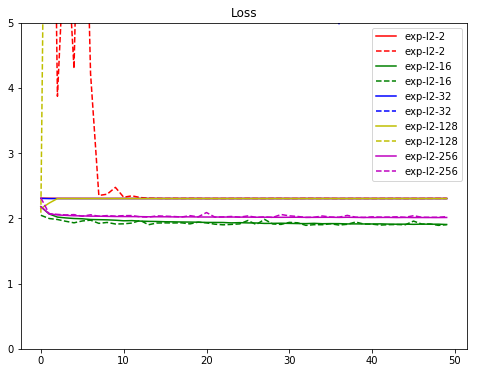

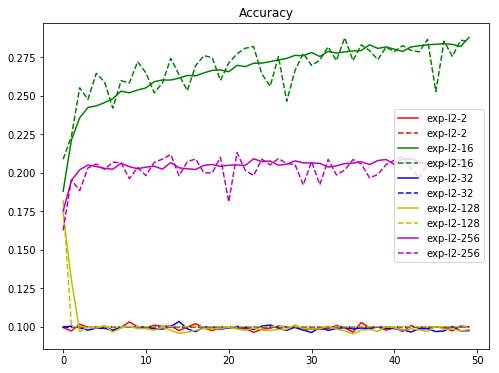

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()